In [1]:
from matplotlib import pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from final_project_code import FinalProject 
from newton_raphson import Newton_Raphson
from final_plot import plot_stuff
from my_svm import supp_vec_machine
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from itertools import combinations
from matplotlib.patches import Patch
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

In [4]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

FP = FinalProject()
df = pd.read_csv("./AG_Corp_Prod_DataBase.csv")

/tmp/ipykernel_64861/4231091402.py:7: DtypeWarning: Columns (3,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("./AG_Corp_Prod_DataBase.csv")


In [5]:
df['form_dummy'] = np.where(df['Form']==1, 1, -1)

In [6]:
df.drop(["Form"], axis=1, inplace=True)

In [7]:
df = df.rename(columns={"form_dummy":"Form"})

In [10]:
df.head(3)

,Unnamed: 0,id,PSZ,PSZ1900,FoundingYear,Province,Region,Industry,OntheSide,Age,...,Wool,Cotton,MixedMaterials,Wood,Paper,MetalsandMachines,Foods,Chemical,Mineral,Form
0,0,4156,NaN,NaN,1860.0,30,CentralIndustrial,Paper,0.0,35.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1
1,1,52010,NaN,NaN,NaN,51,Previslitskii,Foods A,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1
2,2,30937,NaN,NaN,NaN,41,CentralBlacksoil,Foods A,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1


In [11]:

df = FP.balanced_one_minus_one(df)
train, validate, test = FP.split_data(df)
df_train, X_train, y_train = FP.prepare_data(train)
df_validate, X_validate, y_validate= FP.prepare_data(validate)
df_test, X_test, y_test = FP.prepare_data(test)

df incorporated have 2393 many rows
after balancing, df not incorporated have 2393 many rows


In [ ]:
df = df[['id', 'Form', 'FoundingYear',
       'Province', 'Region', 'Industry', 'OntheSide', 'Age', 'TaxedActivity',
       'YEAR', 'SubindustryCode', 'STCAP', 'Revenue',
       'TotalWorkers', 'TotalPower', 'GrandTotalWorkers', 'RevperWorker',
       'PowerperWorker', 'RevperGrandWorker', 'PowerperGrandWorker',
       'logRevperWorker', 'logPowerperWorker', 'logRevperGrandWorker',
       'logPowerperGrandWorker', 'logRev', 'logWorkers', 'logPower',
       'RegIndGroup', 'RegIndYearGroup', 'ProvIndGroup', 'ProvIndYearGroup',
       'IndYearGroup', 'IndustryFactor', 'ProvinceFactor', 'YearFactor',
       'AKTS', 'PAI', 'factory_id', 'FormNextYear', 'FormNextNextYear',
       'FactoryisCorpin1894', 'FormNextYearin1894', 'FactoryisCorpin1900',
       'FormNextYearin1900', 'FactoryisCorpin1908', 'NEWDEV', 'SHARES',
       'STPRICE', 'BONDS', 'Silk', 'Flax', 'Animal', 'Wool', 'Cotton',
       'MixedMaterials', 'Wood', 'Paper', 'MetalsandMachines', 'Foods',
       'Chemical', 'Mineral']]

In [12]:
cols = ['PowerperWorker', 'RevperGrandWorker']
cols = ['logWorkers', 'logPower'] 
NR = Newton_Raphson()
FP = FinalProject()
X_train,y_train = FP.make_ready_for_regression(X_train, y_train, cols) 
X_validate,y_validate= FP.make_ready_for_regression(X_validate, y_validate, cols) 
X_test, y_test = FP.make_ready_for_regression(X_test, y_test, cols)

In [13]:
mySVC = SVC(kernel="linear", gamma="auto", shrinking=False)
mySVC.fit(X_test, y_test)

/home/xianzhiwang/miniforge3/envs/ml-0451/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(gamma='auto', kernel='linear', shrinking=False)

SVC


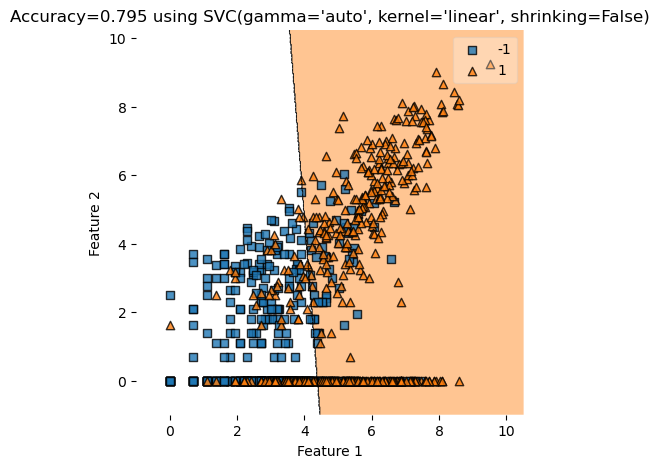

In [14]:
from newton_raphson import Newton_Raphson 
NR2 = Newton_Raphson()
y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)
NR2.simple_plot(model = mySVC, X = X_test, y = y_test, size_1=5, size_2=5)
print("SVC")

In [15]:
print(mySVC.coef_)
print(mySVC.intercept_)

[[0.83016322 0.06688628]]
[-3.63826225]


In [16]:
row_length = X_train.shape[1]+1
print(row_length)

3


In [20]:
mysvm = supp_vec_machine(row_length=row_length)
mysvm.regress(X_test,y_test, max_iter=1e4)

iter_count: 0
iter_count: 10
iter_count: 20
iter_count: 30
iter_count: 40
iter_count: 50
iter_count: 60
iter_count: 70
iter_count: 80
iter_count: 90
iter_count: 100
iter_count: 110
iter_count: 120
iter_count: 130
iter_count: 140
iter_count: 150
iter_count: 160
iter_count: 170
iter_count: 180
iter_count: 190
iter_count: 200
iter_count: 210
iter_count: 220
iter_count: 230
iter_count: 240
iter_count: 250
iter_count: 260
iter_count: 270
iter_count: 280
iter_count: 290
iter_count: 300
iter_count: 310
iter_count: 320
iter_count: 330
iter_count: 340
iter_count: 350
iter_count: 360
iter_count: 370
iter_count: 380
iter_count: 390
iter_count: 400
iter_count: 410
iter_count: 420
iter_count: 430
iter_count: 440
iter_count: 450
iter_count: 460
iter_count: 470
iter_count: 480
iter_count: 490
iter_count: 500
iter_count: 510
iter_count: 520
iter_count: 530
iter_count: 540
iter_count: 550
iter_count: 560
iter_count: 570
iter_count: 580
iter_count: 590
iter_count: 600
iter_count: 610
iter_count: 620
ite

In [21]:
print(mysvm.weights)
print(mysvm.b)

[[80.39579803]
 [55.68506896]
 [ 0.97604943]]
[-0.]


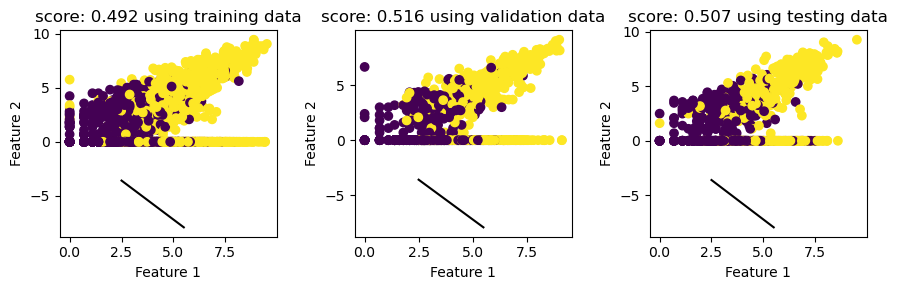

In [22]:
mysvm.big_plot(X_train, y_train, X_validate, y_validate, X_test, y_test, 9,3)